***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, buscan encontrar característcias generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.


### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado em metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

> ### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

### Importando pandas y leyendo el dataset del projecto

https://pandas.pydata.org/

In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv('datos.csv')

In [15]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de datos</font>
***

### Variables cualitativas ordinales

► Variables que pueden ser ordenadas o que responen algun tipo de jerarquía

In [ ]:
sorted(datos['Años de Estudio'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variables cualitativas nominales

► Variables que no pueden ser ordenadas ni responden alguna jerarquía.

In [ ]:
sorted(datos['Ciudad'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [ ]:
sorted(datos['Sexo'].unique())

[0, 1]

In [ ]:
sorted(datos['Color'].unique())

[0, 2, 4, 6, 8]

### Variables cuantitativas discretas

► Variables que representan un conteo donde los valores posibles forman un conjunto finito o numerable.


In [3]:
print('Edades entre %s y %s' % (datos.Edad.min(), datos.Edad.max()))

Edades entre 13 y 99


#### <font color='red'>Observación</font>
***
> La variable edad puede ser clasificada de tres formas diferentes:
> 1. <b>CUANTITATIVA DISCRETA</b> - cuando representa años completos (números enteros);
> 2. <b>CUANTITATIVA CONTINUA</b> - cuando representa la edad exacta, siendo representada por fracciones de años;
> 3. <b>CUALITATIVA ORDINAL</b> - cuando representa  intervalos de edad.

### Variables cuantitativas continuas

► Variables que representan un conteo o medición que asume valores en escalas continuas (números reales).

In [4]:
print('Alturas entre %s y %s' % (round(datos.Altura.min(),4), round(datos.Altura.max(),4)))

Alturas entre 1.3392 y 2.0285


### Clasificación de una variable
<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img001.png' width='70%'>

# <font color=green>2 DISTRIBUCIÓN DE FRECUENCIAS</font>
***

El primer paso en un análisis es conocer el comportamiento de las variables involucradas en el estudio. Utilizando técnicas estadísticas como el análisis de las <b> DISTRIBUCIONES DE FRECUENCIAS </b> e <b> HISTOGRAMAS </b> podemos evaluar mejor cómo se distribuyen los fenómenos del estudio.



## <font color=green>2.1 Distribución de frecuencias para variables cualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [5]:
datos["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [6]:
datos["Sexo"].value_counts(normalize = True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [7]:
frecuencia = datos["Sexo"].value_counts()

In [8]:
porcentajes = round(datos["Sexo"].value_counts(normalize = True)*100,2)

In [9]:
dist_fre_cualitativa = pd.DataFrame({"Frecuencia": frecuencia, "Porcentajes (%)": porcentajes})

In [ ]:
dist_fre_cualitativa

,Frecuencia,Porcentajes (%)
0,53250,69.3
1,23590,30.7


Sustituir valores de una columna, el parametro inplace=True hace que las transformaciones queden guardadas en el dataframe

In [10]:
dist_fre_cualitativa.rename(index = {0:'Masculino',1:'Femenino'}, inplace = True)

In [11]:
dist_fre_cualitativa

,Frecuencia,Porcentajes (%)
Masculino,53250,69.3
Femenino,23590,30.7


In [ ]:
dist_fre_cualitativa.rename_axis('Sexo', axis='columns', inplace=True)

In [ ]:
dist_fre_cualitativa

Sexo,Frecuencia,Porcentajes (%)
Masculino,53250,69.3
Femenino,23590,30.7


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [14]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indio',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}

In [15]:
frecuencia = pd.crosstab(datos.Sexo,
                         datos.Color)

In [16]:
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [17]:
frecuencia.rename(index = sexo, inplace = True)

In [18]:
frecuencia.rename(columns = color, inplace = True)

In [19]:
frecuencia

Color,Indio,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


## <font color=green>2.2 Distribución de frecuencia para variables cuantitativas (clases personalizadas)</font>
***

### Paso 1 - Especifique los límites de cada clase

Utilice la siguiente clasificación:

<b>A</b> ► Más de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Hasta 2 SM

donde <b>SM</b> es el valor del salario mínimo en ese momento. En nuestro caso <b>788 mil pesos colombianos</b> (2018):

<b>A</b> ► Más de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Hasta 1.576


In [21]:
datos.Ingreso.min()

0

In [22]:
datos.Ingreso.max()

200000

In [24]:
clases = [0, 1576, 3152, 7880, 15760, 200000]

In [25]:
labels = ['E', 'D', 'C', 'B', 'A']

### Paso 2 - Crear la tabla de frecuencias

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [31]:
pd.cut(
    x = datos.Ingreso,
    bins = clases,
    labels = labels,
    include_lowest = True)


0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Ingreso, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [32]:
frecuencia = pd.value_counts(
    pd.cut(
    x = datos.Ingreso,
    bins = clases,
    labels = labels,
    include_lowest = True)

)
frecuencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Ingreso, dtype: int64

In [35]:
porcentajes = pd.value_counts(
                              pd.cut(
                                      x = datos.Ingreso,
                                      bins = clases,
                                      labels = labels,
                                      include_lowest = True),
                              normalize = True
              )*100
porcentajes

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Ingreso, dtype: float64

In [36]:
dist_fre_cuantitativa_personalizada = pd.DataFrame({"Frecuencia": frecuencia, "Porcentajes (%)": porcentajes})

In [37]:
dist_fre_cuantitativa_personalizada

,Frecuencia,Porcentajes (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [38]:
dist_fre_cuantitativa_personalizada.sort_index(ascending =False)

,Frecuencia,Porcentajes (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [39]:
clases = [datos.Altura.min(), 1.65, 1.75, datos.Altura.max()]
labels = ['1 - Baja', '2 - Media', '3 - Alta']

frecuencia = pd.value_counts(
    pd.cut(
        x = datos.Altura,
        bins = clases,
        labels = labels,
        include_lowest = True
    )
)

porcentaje = pd.value_counts(
    pd.cut(
        x = datos.Altura,
        bins = clases,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_frec_altura = pd.DataFrame(
    {'Frecuencia': frecuencia, 'Porcentaje (%)': porcentaje}
)

dist_frec_altura.rename_axis('Estatura', axis= 'columns', inplace = True)

dist_frec_altura.sort_index(ascending = True, inplace = True)

dist_frec_altura

Estatura,Frecuencia,Porcentaje (%)
1 - Baja,20529,26.716554
2 - Media,36162,47.061426
3 - Alta,20149,26.222020


## <font color=green>2.3 Distribución de frecuencia para variables cuantitativas (clases de amplitud fija)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [44]:
import numpy as np

### Paso 1 - Difiniendo el número de clases

#### Regla de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [42]:
n = datos.shape[0]
n

76840

In [45]:
k = 1 + (10/3)* np.log10(n)
k

17.285291187298853

In [46]:
k = int(k)
k

17

In [50]:
frecuencia = pd.value_counts(
    pd.cut(
        x= datos.Ingreso,
        bins = 17,
        include_lowest= True
    ),
    sort = False
)
frecuencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Ingreso, dtype: int64

In [51]:
porcentajes = pd.value_counts(
    pd.cut(
        x= datos.Ingreso,
        bins = 17,
        include_lowest= True
    ),
    sort = False,
    normalize= True
)*100
porcentajes

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Ingreso, dtype: float64

In [54]:
dist_frec_cuantitativa_amplitud_fija = pd.DataFrame(
    {'Frecuencia': frecuencia, 'Porcentaje (%)': porcentajes}
)
dist_frec_cuantitativa_amplitud_fija


,Frecuencia,Porcentaje (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


### Paso 2 - Crear la tabla de frecuencias

## <font color=green>2.4 Histograma</font>
***

El <b>HISTOGRAMA</b> es la representación gráfica de una distribución de frecuencia. Es un gráfico formado por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

### Importando la biblioteca

https://seaborn.pydata.org/

In [55]:
import seaborn as sns

<ipython-input-23-05990087843e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde = False)


<Axes: title={'center': 'Distribución de frecuencia - Altura'}, xlabel='Altura (metros)'>

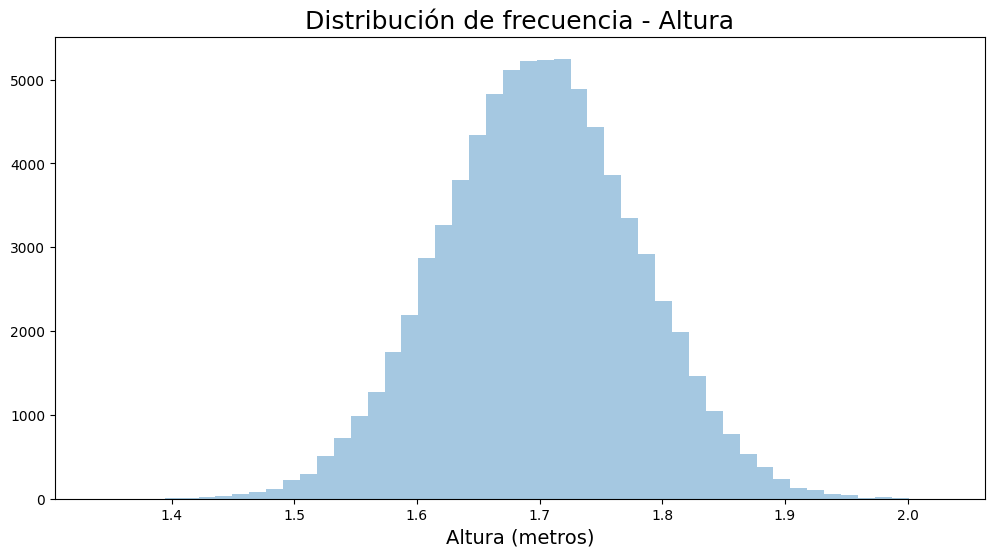

In [23]:
ax = sns.distplot(datos.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

<ipython-input-25-db0a9adb5a4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde = True)


<Axes: title={'center': 'Distribución de frecuencia - Altura - KDE'}, xlabel='Altura', ylabel='Density'>

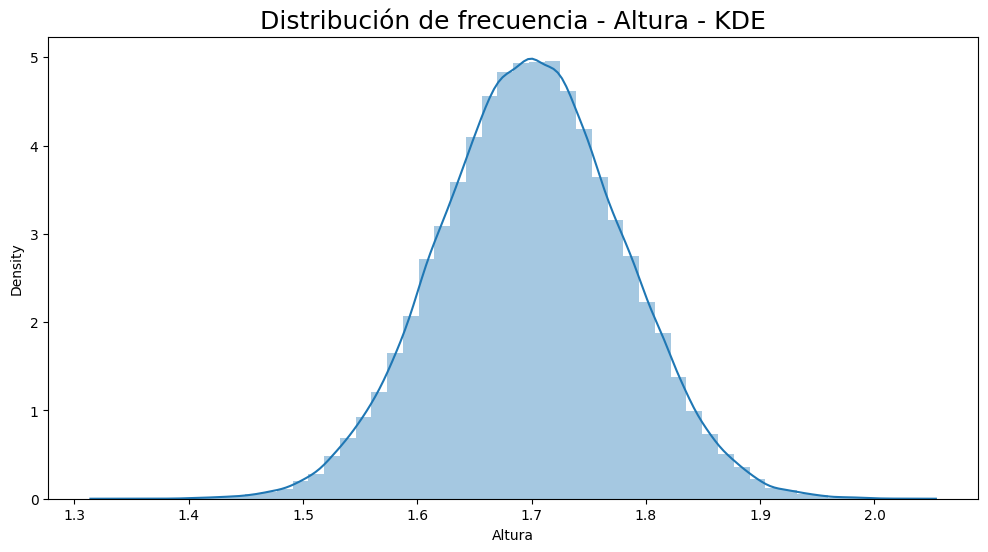

In [25]:
ax = sns.distplot(datos.Altura, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de frecuencia - Altura - KDE', fontsize=18)
# ax.set_xlabel('Altura (metros)', fontsize=14)
ax

<Axes: >

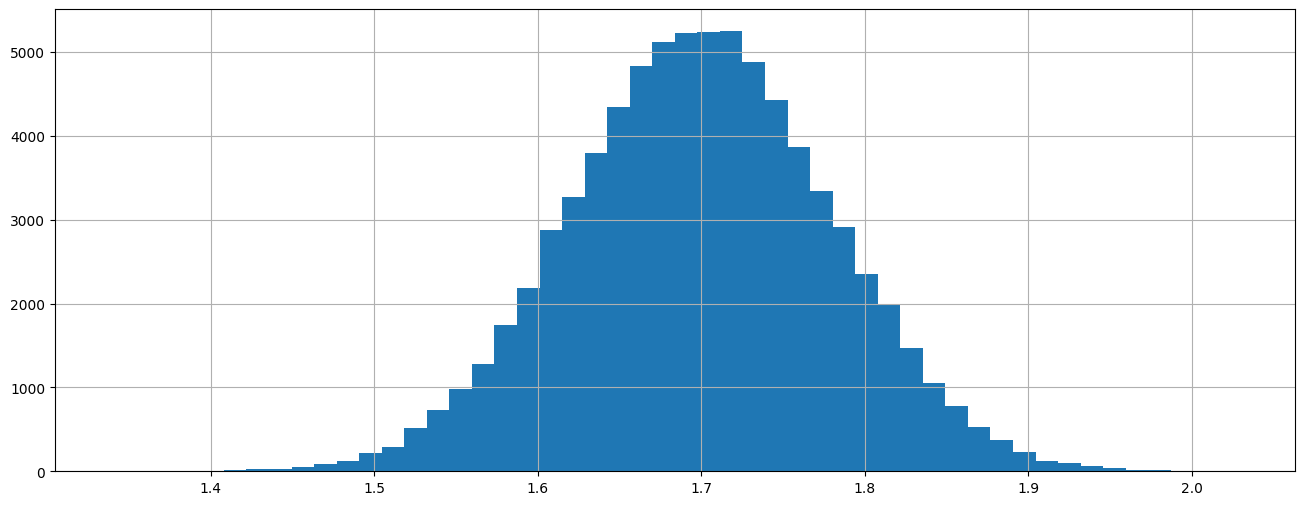

In [66]:
datos.Altura.hist(bins= 50, figsize= (16,6))

# <font color=green>3 MEDIDAS DE TENDENCIA CENTRAL</font>
***

## DataFrame de ejemplo

In [3]:
df = pd.DataFrame(data = {'Maria': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,Maria,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=green>3.1 Media aritmética</font>
***

Es representada por $\mu$ cuando se refiere a la población y por $\bar{X}$ cuando se refiere a la muestra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

donde

$n$ = número de observaciones (registros)

$X_i$ = valor de la i-ésima observación (registro)

In [4]:
med_maria = (8 + 10 + 4 + 8 + 6 + 10 + 8)/7
med_maria

7.714285714285714

In [6]:
df['María'].mean()

7.714285714285714

In [9]:
datos.groupby(['Sexo'])['Ingreso'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Ingreso, dtype: float64

In [10]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Edad': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [13]:
dataset.groupby(['Sexo'])['Edad'].mean()

Sexo
H    45.750000
M    46.333333
Name: Edad, dtype: float64

In [16]:
dataset.groupby(['Sexo'])['Edad'].mean().loc['H']

45.75

## <font color=green>3.2 Mediana</font>
***

Para obtener la mediana de un conjunto de datos, debemos proceder de la siguiente manera:
1. Ordenar el conjunto de datos;
2. Identificar el número de observaciones (registros) del conjunto de datos ($n$);
3. Identicar el elemento del medio:

> Cuando $n$ sea impar, la posición del elemento del medio se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n+1}{2}$$

> Cuando $n$ sea par, la posición del elemento mediano se obtendrá de la siguiente manera:


# $$Elemento_{Md} = \frac{n}2$$

4. Obtener la mediana:

> Cuando $n$ sea impar:


# $$Md = X_{Elemento_{Md}}$$

> Cuando $n$ sea par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Ejemplo 1 - n impar

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img002.png' width='40%' style="float:left">

In [58]:
notas_maria = df['Maria']
notas_maria

Matemática     8
Portugués     10
Inglés         4
Geografía      8
Historia       6
Física        10
Química        8
Name: Maria, dtype: int64

In [61]:
n= notas_maria.shape[0]

In [59]:
  notas_maria = notas_maria.sort_values()
  notas_maria

Inglés         4
Historia       6
Matemática     8
Geografía      8
Química        8
Portugués     10
Física        10
Name: Maria, dtype: int64

In [9]:
notas_maria = notas_maria.reset_index()
notas_maria

Asignaturas,index,Maria
0,Matemática,8
1,Portugués,10
2,Inglés,4
3,Geografía,8
4,Historia,6
5,Física,10
6,Química,8


In [62]:
elemento_md = (n+1)/2
notas_maria.loc[elemento_md - 1]

index    Geografía
Maria            8
Name: 3, dtype: object

In [63]:
mediana = notas_maria.median()

<ipython-input-63-d2a2948e972a>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = notas_maria.median()


In [64]:
mediana


Maria    8.0
dtype: float64

### Ejemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img003.png' width='50%' style="float:left">

In [69]:
notas_pedro = df['Pedro'].sample(6)

In [70]:
m = notas_pedro.shape[0]
m

6

In [71]:
elemento_md2 = m/2

In [73]:
notas_pedro.median()


2.5

In [ ]:
mediana

### Obtener la mediana en nuestro conjunto de datos

In [79]:
datos.Ingreso.median()

1200.0

## <font color=green>3.3 Moda</font>
***

La moda se puede definir como el valor más frecuente de un conjunto de datos. La moda es ampliamente utilizada para datos cualitativos.

In [80]:
df.mode()

Asignaturas,Maria,Pedro,Pablo
0,8,10.0,8.0


### Obteniendo la moda de nuestro dataset

In [81]:
datos.Ingreso.mode()

0    788
Name: Ingreso, dtype: int64

In [82]:
datos.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

## <font color=green>3.4 Relación entre media, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img004.png' width='80%'>

### Evaluando la variable INGRESO

In [ ]:
ax = sns.distplot(datos.Ingreso)
ax.figure.set_size_inches(12,6)
ax

In [ ]:
Moda = datos.Ingreso.mode()[0]
Moda

In [ ]:
Mediana = datos.Ingreso.median()
Mediana

In [ ]:
Media = datos.Ingreso.mean()
Media

In [ ]:
Moda < Mediana < Media

***

### Evaluando la variable ALTURA

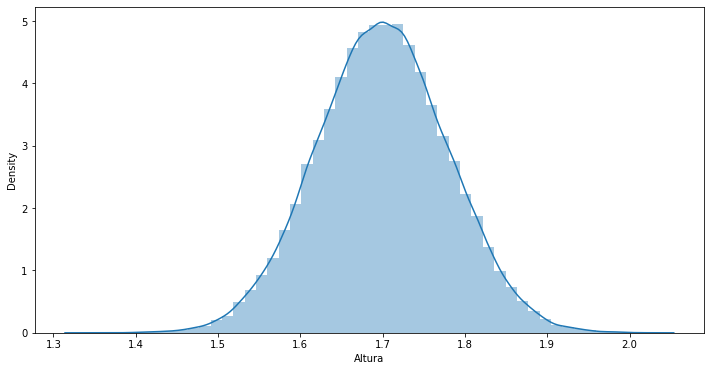

In [ ]:
ax = sns.distplot(datos.Altura)
ax.figure.set_size_inches(12,6)
ax

In [ ]:
Moda = datos.Altura.mode()
Moda

In [ ]:
Media = datos.Altura.mean()
Media

In [ ]:
Mediana = datos.Altura.median()
Mediana

***

### Evaluando la variable AÑOS DE ESTUDIO

In [ ]:
ax = sns.distplot(datos["Años de Estudio"],bins = 17)
ax.figure.set_size_inches(12,6)
ax

In [ ]:
Moda  = datos["Años de Estudio"].mode()[0]
Moda

In [ ]:
Mediana = datos["Años de Estudio"].median()
Mediana

In [ ]:
Media = datos["Años de Estudio"].mean()
Media

In [ ]:
Moda > Mediana > Media

# <font color=green>4 MEDIDAS DE LOCALIZACIÓN</font>
***

## <font color=green>4.1 Cuartiles, deciles y percentiles</font>
***

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

In [4]:
datos.Ingreso.quantile()

1200.0

In [6]:
datos.Ingreso.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Ingreso, dtype: float64

In [ ]:
datos.Ingreso.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [7]:
datos.Ingreso.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Ingreso, dtype: float64

In [9]:
datos.Ingreso.quantile([i/100 for i in range(1,100)])


0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Ingreso, Length: 99, dtype: float64

In [10]:
import seaborn as sns

In [ ]:
datos

<ipython-input-28-ed2d2e6e8e77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Edad,


<Axes: title={'center': 'Distribución de Frecuencia Acumulada'}, xlabel='Años', ylabel='Acumulado'>

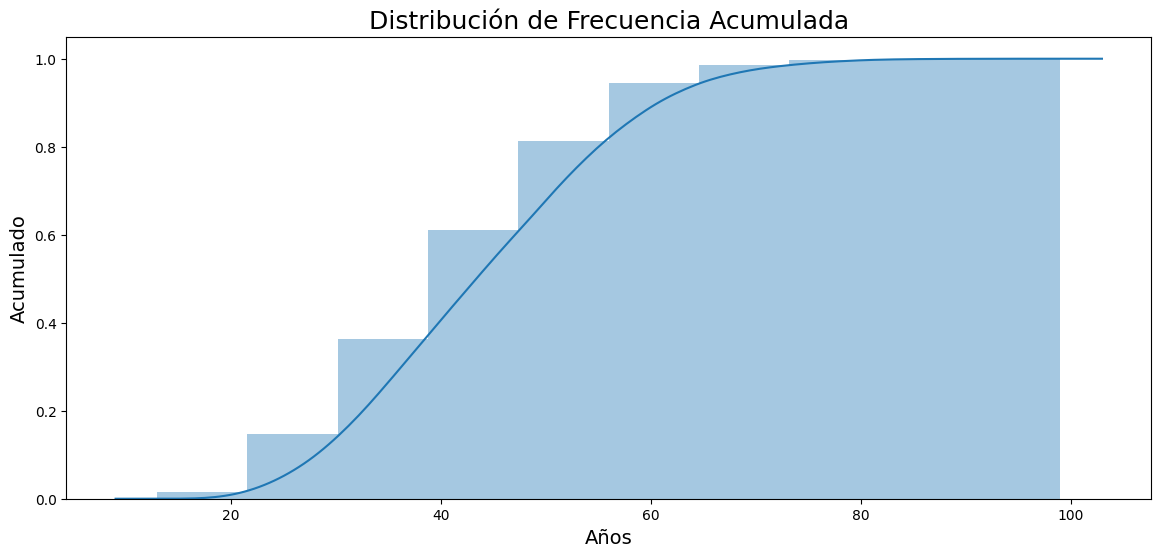

In [28]:
ax = sns.distplot(datos.Edad,
                  hist_kws = {'cumulative':True},
                  kde_kws= {'cumulative': True},
                  bins=10)

ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencia Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Años', fontsize=14)
ax

In [26]:
datos.Edad.quantile([i/10 for i in range(1,10)])


0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Edad, dtype: float64

## <font color=green>4.2 Box-plot</font>
***

El *box plot* da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por $IIQ$ (distancia inter cuartil). Las posiciones relativas de $Q1$, $Mediana$ y $Q3$ dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

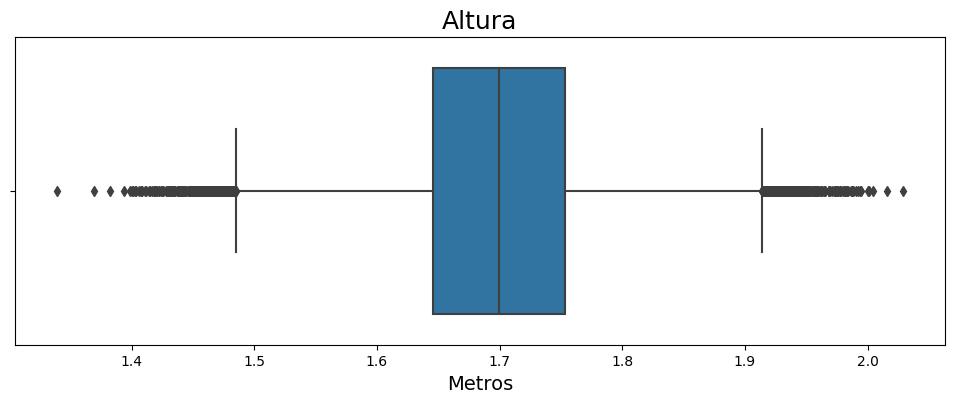

In [38]:
ax = sns.boxplot(
                  x = 'Altura',
                  data = datos,
                  orient = 'h'
)

ax.figure.set_size_inches(12,4)
ax.set_title('Altura',fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

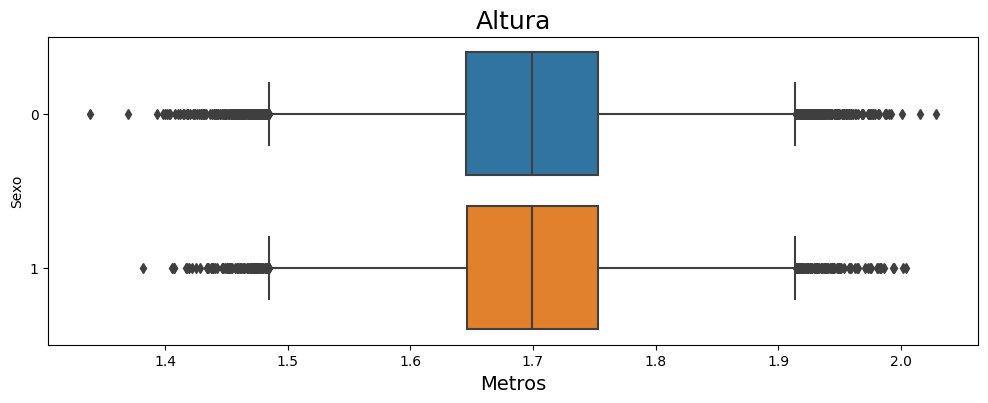

In [40]:
# Agregamos el parametro y = 'Sexo' para poder comparar el gráfico de los datos de ambos sexos
ax = sns.boxplot(
                  x = 'Altura',
                  y = 'Sexo',
                  data = datos,
                  orient = 'h'
)
ax.figure.set_size_inches(12,4)
ax.set_title('Altura',fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

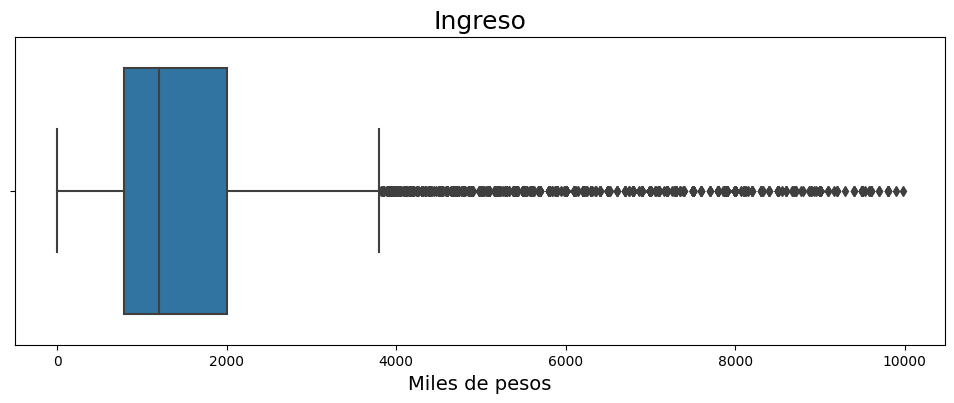

In [44]:
# Agregamos un filtro Ingreso<10000 para visualizar de serca el comportamiento de la variable a la izquierda del gráfico
ax = sns.boxplot(
                  x = 'Ingreso',
                  data = datos.query('Ingreso < 10000'),
                  orient = 'h'
)

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso',fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos', ylabel='Sexo'>

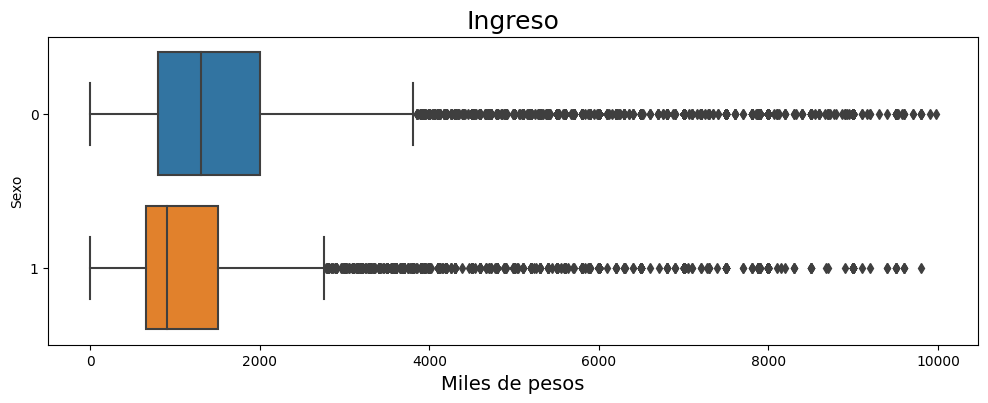

In [45]:
ax = sns.boxplot(
                  x = 'Ingreso',
                  y = 'Sexo',
                  data = datos.query('Ingreso < 10000'),
                  orient = 'h'
)

ax.figure.set_size_inches(12,4)
ax.set_title('Ingreso',fontsize=18)
ax.set_xlabel('Miles de pesos', fontsize=14)
ax

In [ ]:

ax = sns.boxplot(
                  x = 'Ingreso',
                  y = 'Sexo',
                  data = datos.query('Ingreso < 10000'),
                  orient = 'h'
)
ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio',fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años', ylabel='Sexo'>

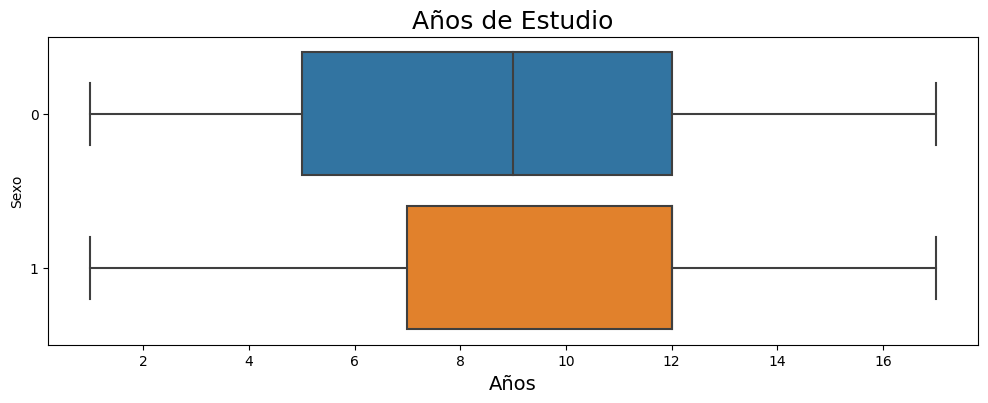

In [47]:
ax = sns.boxplot(
                  x = 'Años de Estudio',
                  y = 'Sexo',
                  data = datos.query('Ingreso < 10000'),
                  orient = 'h'
)

ax.figure.set_size_inches(12,4)
ax.set_title('Años de Estudio',fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

<Axes: title={'center': 'Ingreso ($) - Bogotá X Medellín'}, xlabel='$', ylabel='Ciudad'>

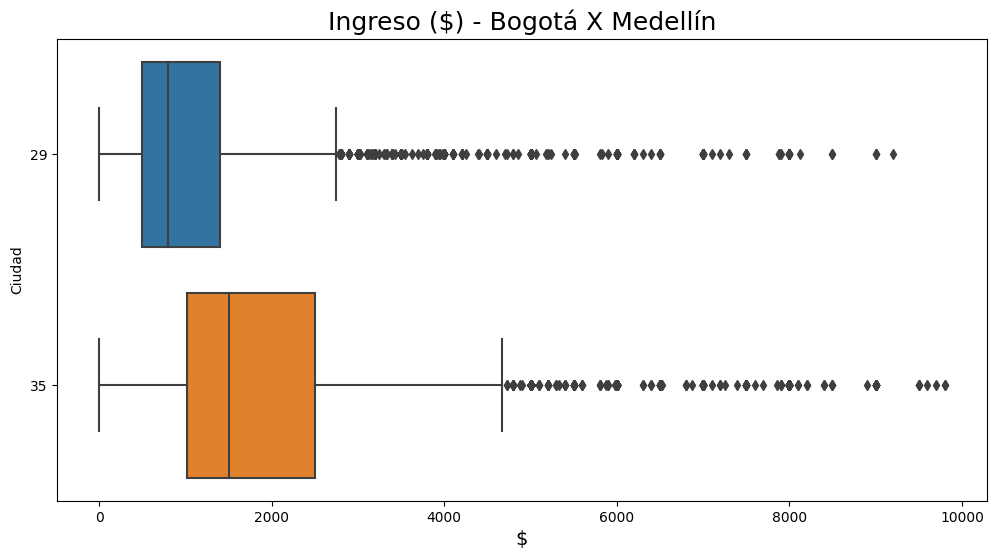

In [48]:
ax = sns.boxplot(x = 'Ingreso', y = 'Ciudad', data = datos.query('(Ciudad==35 or Ciudad==29) and Ingreso < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Ingreso ($) - Bogotá X Medellín', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSIÓN</font>
***

Aunque las medidas de tendencia central y de localización proporcionan un resumen muy importante de los datos, pueden no ser suficientes para caracterizar diferentes conjuntos, especialmente cuando las observaciones de una distribución dada presentan datos muy dispersos.

## <font color=green>5.1 Desviación media absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [4]:
df = pd.DataFrame(data = {'Maria': [8, 10, 4, 8, 6, 10, 8],
                          'Pedro': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Pablo': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Portugués',
                           'Inglés',
                           'Geografía',
                           'Historia',
                           'Física',
                           'Química'])
df.rename_axis('Asignaturas', axis = 'columns', inplace = True)
df

Asignaturas,Maria,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [4]:
df


Asignaturas,Maria,Pedro,Pablo
Matemática,8,10.0,7.5
Portugués,10,2.0,8.0
Inglés,4,0.5,7.0
Geografía,8,1.0,8.0
Historia,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [5]:
df.mean()

Asignaturas
Maria    7.714286
Pedro    5.142857
Pablo    7.714286
dtype: float64

In [6]:
df.median()

Asignaturas
Maria    8.0
Pedro    3.0
Pablo    8.0
dtype: float64

In [6]:
# Serie notas_maria que es limitada para hacer ciertas operaciones
notas_maria = df['Maria']
notas_maria

Matemática     8
Portugués     10
Inglés         4
Geografía      8
Historia       6
Física        10
Química        8
Name: Maria, dtype: int64

In [7]:
# Dataframe notas_maria que permite hacer otras operaciones
notas_maria = df[['Maria']]
notas_maria

Asignaturas,Maria
Matemática,8
Portugués,10
Inglés,4
Geografía,8
Historia,6
Física,10
Química,8


In [10]:
# Guarda el valor si usamos el indicador de indice 0
nota_media_maria = notas_maria.mean()[0]
nota_media_maria

<ipython-input-10-861ee0e814a5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nota_media_maria = notas_maria.mean()[0]


7.714285714285714

In [11]:
notas_maria['Desviacion'] = notas_maria['Maria'] - nota_media_maria
notas_maria

Asignaturas,index,Maria,Desviacion
0,Matemática,8,0.285714
1,Portugués,10,2.285714
2,Inglés,4,-3.714286
3,Geografía,8,0.285714
4,Historia,6,-1.714286
5,Física,10,2.285714
6,Química,8,0.285714


In [12]:
notas_maria['|Desviacion|'] = notas_maria['Desviacion'].abs()
notas_maria

Asignaturas,index,Maria,Desviacion,|Desviacion|
0,Matemática,8,0.285714,0.285714
1,Portugués,10,2.285714,2.285714
2,Inglés,4,-3.714286,3.714286
3,Geografía,8,0.285714,0.285714
4,Historia,6,-1.714286,1.714286
5,Física,10,2.285714,2.285714
6,Química,8,0.285714,0.285714


<Axes: >

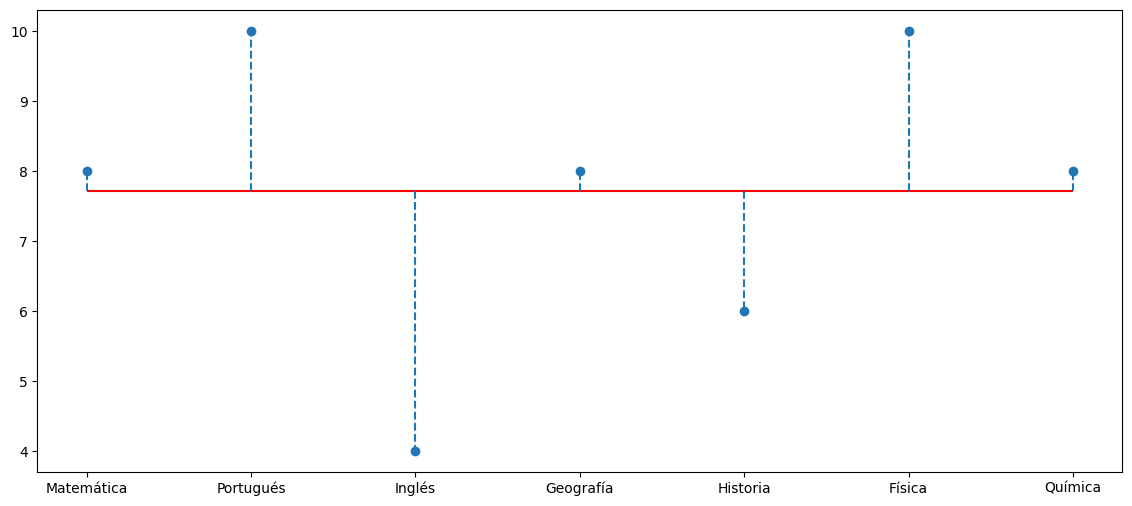

In [27]:
ax = notas_maria['Maria'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_maria, xmin = 0, xmax = notas_maria.shape[0] - 1, colors='red')
for i in range(notas_maria.shape[0]):
    ax.vlines(x = i, ymin = nota_media_maria, ymax = notas_maria['Maria'][i], linestyles='dashed')
ax

In [28]:
notas_maria['|Desviacion|'].mean()

1.5510204081632648

In [29]:
notas_maria['Maria'].mad()

<ipython-input-29-18d22b3bf547>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  notas_maria['Maria'].mad()


1.5510204081632648

In [31]:
df['Pablo'].mad()

<ipython-input-31-9036a537ac49>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['Pablo'].mad()


0.4693877551020408

<Axes: >

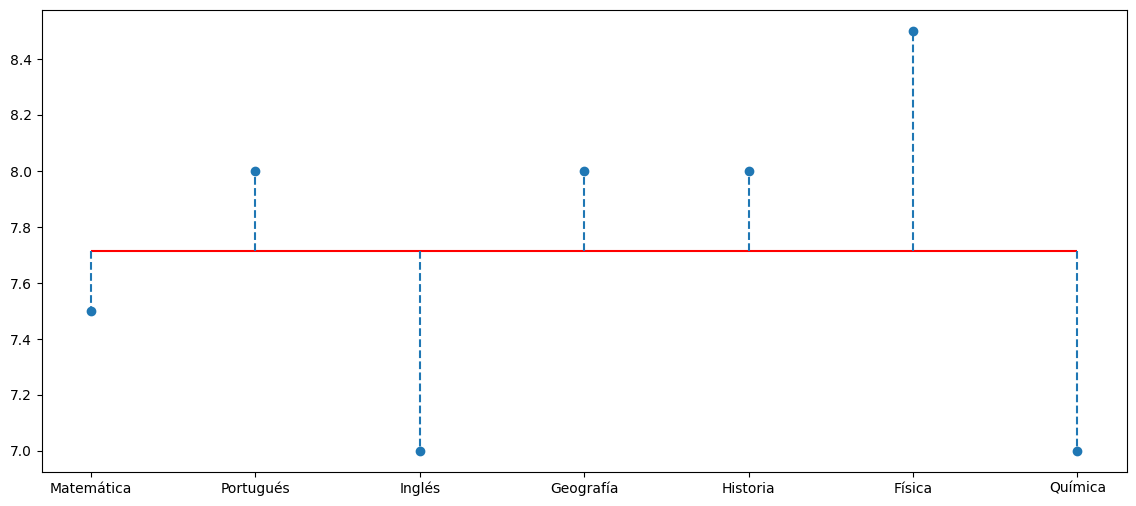

In [38]:
notas_pablo = df['Pablo']
nota_media_pablo = df['Pablo'].mean()
ax = df['Pablo'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_pablo, xmin = 0, xmax = df['Pablo'].shape[0] - 1, colors='red')
for i in range(notas_pablo.shape[0]):
    ax.vlines(x = i, ymin = nota_media_pablo, ymax = df['Pablo'][i], linestyles='dashed')
ax

In [34]:
df['Pedro'].mad()

<ipython-input-34-f6ddc1a52048>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['Pedro'].mad()


4.020408163265306

<Axes: >

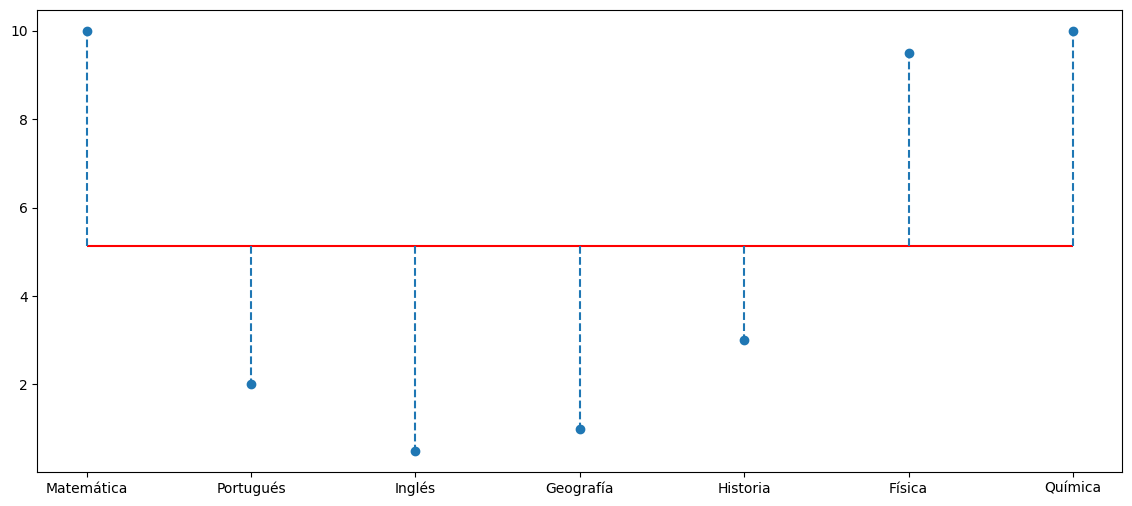

In [41]:
notas_pedro = df['Pedro']
nota_media_pedro = df['Pedro'].mean()
ax = df['Pedro'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_pedro, xmin = 0, xmax = df['Pedro'].shape[0] - 1, colors='red')
for i in range(notas_pedro.shape[0]):
    ax.vlines(x = i, ymin = nota_media_pedro, ymax = df['Pedro'][i], linestyles='dashed')
ax

## <font color=green>5.2 Varianza</font>
***

### Varianza

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media son elevadas al cuadrado.

### Varianza de la población

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Varianza de la muestra

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [13]:
notas_maria['Desviacion^2'] = notas_maria['Desviacion'].pow(2)
notas_maria

Asignaturas,index,Maria,Desviacion,|Desviacion|,Desviacion^2
0,Matemática,8,0.285714,0.285714,0.081633
1,Portugués,10,2.285714,2.285714,5.224490
2,Inglés,4,-3.714286,3.714286,13.795918
3,Geografía,8,0.285714,0.285714,0.081633
4,Historia,6,-1.714286,1.714286,2.938776
5,Física,10,2.285714,2.285714,5.224490
6,Química,8,0.285714,0.285714,0.081633


In [14]:
notas_maria['Desviacion^2'].sum()/(len(notas_maria) - 1)

4.57142857142857

In [16]:
notas_maria['Maria'].var()

4.57142857142857

## <font color=green>5.3 Desviación estándar</font>
***

Una de las restricciones de la varianza es el hecho de que proporciona medidas cuadráticas de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por lo tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estándar de la población

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$


### Desviación estándar de la muestra

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [21]:
import numpy as np

In [18]:
varianza_maria = notas_maria['Maria'].var()
varianza_maria

4.57142857142857

In [23]:
np.sqrt(varianza_maria)

2.1380899352993947

In [25]:
desviacion_estandar = notas_maria['Maria'].std()
desviacion_estandar

2.1380899352993947

In [27]:
df.mean()

Asignaturas
Maria    7.714286
Pedro    5.142857
Pablo    7.714286
dtype: float64

In [28]:
df.median()

Asignaturas
Maria    8.0
Pedro    3.0
Pablo    8.0
dtype: float64

In [29]:
df.mode()

Asignaturas,Maria,Pedro,Pablo
0,8,10.0,8.0


In [30]:
df.std()

Asignaturas
Maria    2.138090
Pedro    4.460141
Pablo    0.566947
dtype: float64

In [31]:
dataset = pd.DataFrame({
    'Género': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Edad': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset['Edad'].std()

14.184890239656813

In [35]:

dataset.groupby(['Género'])['Edad'].std().loc['M']

16.645319662495723